name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


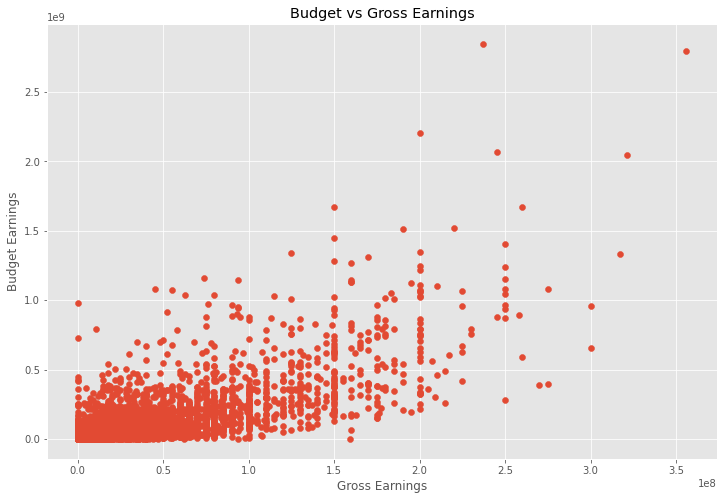

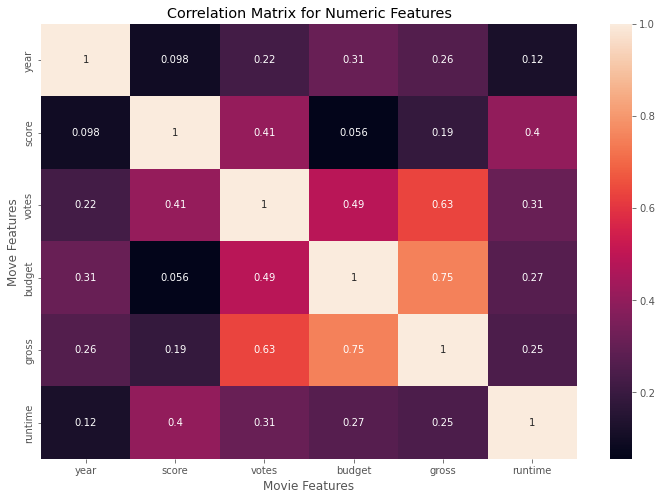

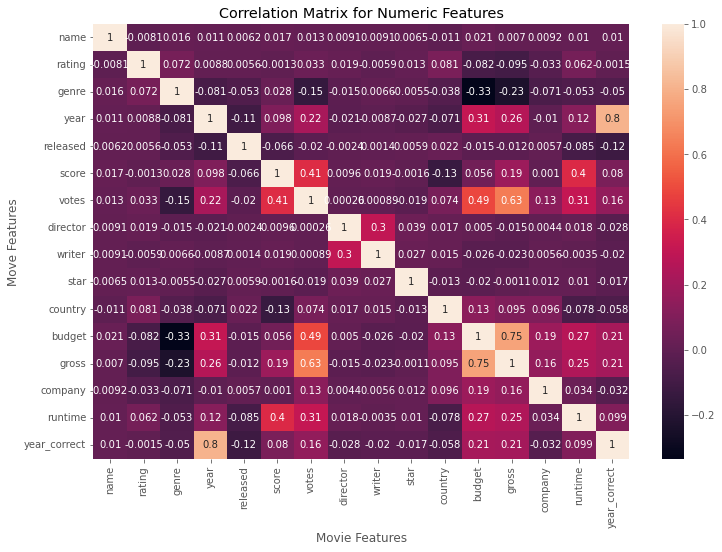

votes         gross           0.632834
gross         votes           0.632834
              budget          0.750157
budget        gross           0.750157
year_correct  year            0.804767
year          year_correct    0.804767
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [78]:
# First let's import the packages we will use in this project

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

#Now we need to read in the data
df = pd.read_csv(r'C:\Users\Luis\Downloads\movies_db.csv')

df.head()

#Let's see if there is any missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull());
  print('{} - {}%'.format(col, pct_missing));

#Data types for our columns

df.dtypes

#Change data type of columns 
df['budget'] = df['budget'].fillna(0).astype(np.int64)
df['gross'] = df['gross'].fillna(0).astype(np.int64)

df.dtypes 

df

# Create a correct year column

df['year_correct'] = df['released'].astype(str).str[-4:]

df

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

pd.set_option('display.max_rows', None);

#Drop any duplicates

#df.drop_duplicates()

#Budget high correlation
#Company high correlation

#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget Earnings')
plt.show()

df.head()

# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"} )

df.corr(method = 'pearson') #pearson, kendall, spearman

# High correlation between budget and gross
# I was right

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Move Features')
plt.show()

#Looks at Company

df.head()

df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Move Features')
plt.show()

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

high_correlation = sorted_pairs[(sorted_pairs) > 0.5]

high_correlation

# Votes and budget have the highest correlation to gross Earnings
# Company has low correlation